# Capstone: Unsupervised Learning

## Data Exploration
#### LSTW: Large-Scale Traffic and Weather Events Dataset
Published: December 2019

"LSTW is a large-scale, country-wide dataset for transportation and traffic research, which contains traffic and weather event data for the United States. In terms of traffic, we have several types of events including accident, congestion, construction, etc. In terms of weather events, we have several types including rain, snow, storm, cold weather event, etc. This dataset is continuously being collected from August 2016, and today it contains about 29.5 million traffic and weather events."

Traffic congestion is an inescapable problem of the modern world. I don't believe there is a sane person fond of sitting in traffic, can the data be clustered in such a way as to provide insight into how traffic relates to weather?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

import umap
import warnings
warnings.filterwarnings("ignore")

In [2]:
traffic = pd.read_csv('trafficdata.csv', dtype = {'EventID':'object','Type':'object','Severity':'object',
                                                 'TMC':'int64','Description':'object','StartTime(UTC)':'object',
                                                 'EndTime(UTC)':'object','TimeZone':'object','LocationLat':'float64',
                                                 'LocationLng':'float64','Distance(mi)':'float64','AirportCode':'object',
                                                 'Number':'float64','Street':'object','Side':'object','City':'object',
                                                 'County':'object','State':'object','ZipCode':'float64'})
weather = pd.read_csv('weatherdata.csv', dtype = {'EventID':'object','Type':'object','Severity':'object','StartTime(UTC)':'object',
                                                 'EndTime(UTC)':'object','TimeZone':'object','LocationLat':'float64',
                                                 'LocationLng':'float64','AirportCode':'object','City':'object','County':'object',
                                                 'State':'object','ZipCode':'float64'})

In [3]:
traffic.columns

Index(['EventId', 'Type', 'Severity', 'TMC', 'Description', 'StartTime(UTC)',
       'EndTime(UTC)', 'TimeZone', 'LocationLat', 'LocationLng',
       'Distance(mi)', 'AirportCode', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'ZipCode'],
      dtype='object')

In [4]:
weather.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'TimeZone', 'LocationLat', 'LocationLng', 'AirportCode', 'City',
       'County', 'State', 'ZipCode'],
      dtype='object')

In [5]:
traffic.head()

,EventId,Type,Severity,TMC,Description,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,Distance(mi),AirportCode,Number,Street,Side,City,County,State,ZipCode
0,T-38768,Congestion,Moderate,73,Severe delays of 18 minutes on US-101 Redwood ...,2016-08-01 00:03:00,2016-08-01 00:14:28,US/Pacific,38.214657,-122.602669,0.0,KO69,NaN,Redwood Hwy S,R,Petaluma,Sonoma,CA,94952.0
1,T-38772,Congestion,Moderate,72,Delays of eight minutes on CA-92 San Mateo Rd ...,2016-08-01 00:07:00,2016-08-01 00:18:44,US/Pacific,37.477329,-122.415703,0.0,KHAF,12685.0,San Mateo Rd,L,Half Moon Bay,San Mateo,CA,94019.0
2,T-38775,Congestion,Moderate,72,Severe delays of 20 minutes and delays increas...,2016-08-01 00:00:00,2016-08-01 00:18:44,US/Pacific,36.985863,-121.981026,0.0,KWVI,NaN,State Highway 1,R,Santa Cruz,Santa Cruz,CA,95062.0
3,T-38777,Congestion,Fast,75,Delays of two minutes on Valley Fwy Southbound...,2016-08-01 00:08:00,2016-08-01 00:19:44,US/Pacific,37.105865,-121.613411,0.0,KE16,NaN,S Valley Fwy S,R,San Martin,Santa Clara,CA,95046.0
4,T-38781,Congestion,Fast,75,Delays of five minutes on CA-37 Sears Point Rd...,2016-08-01 00:13:00,2016-08-01 00:27:26,US/Pacific,38.150387,-122.450569,0.0,KO69,NaN,Sears Point Rd,R,Petaluma,Sonoma,CA,94954.0


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25119048 entries, 0 to 25119047
Data columns (total 19 columns):
EventId           object
Type              object
Severity          object
TMC               int64
Description       object
StartTime(UTC)    object
EndTime(UTC)      object
TimeZone          object
LocationLat       float64
LocationLng       float64
Distance(mi)      float64
AirportCode       object
Number            float64
Street            object
Side              object
City              object
County            object
State             object
ZipCode           float64
dtypes: float64(5), int64(1), object(13)
memory usage: 3.6+ GB


In [7]:
traffic.shape

(25119048, 19)

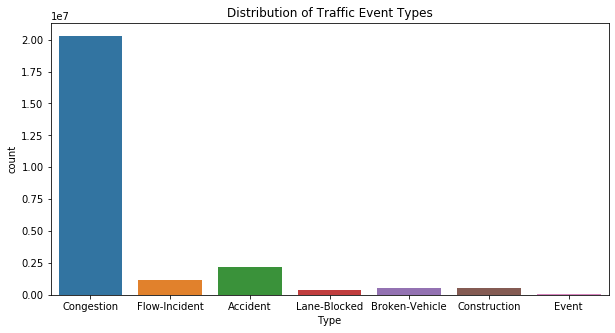

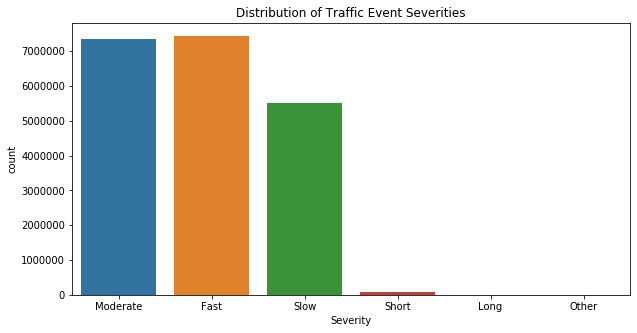

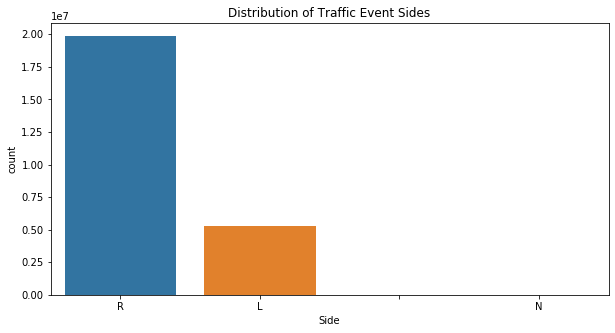

In [8]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Traffic Event Types')
sns.countplot(x='Type',data=traffic)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Distribution of Traffic Event Severities')
sns.countplot(x='Severity',data=traffic)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Distribution of Traffic Event Sides')
sns.countplot(x='Side',data=traffic)
plt.show()

In [9]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-307,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-308,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-309,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-310,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-311,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362031 entries, 0 to 4362030
Data columns (total 13 columns):
EventId           object
Type              object
Severity          object
StartTime(UTC)    object
EndTime(UTC)      object
TimeZone          object
LocationLat       float64
LocationLng       float64
AirportCode       object
City              object
County            object
State             object
ZipCode           float64
dtypes: float64(3), object(10)
memory usage: 432.6+ MB


In [11]:
weather.shape

(4362031, 13)

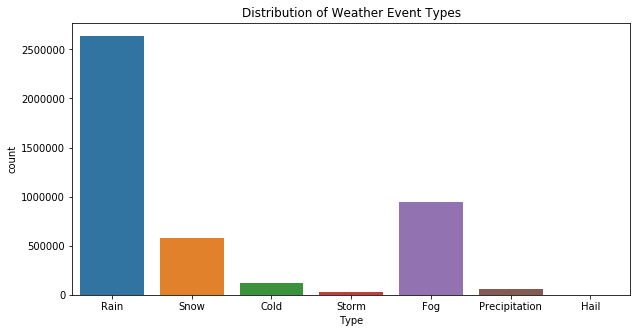

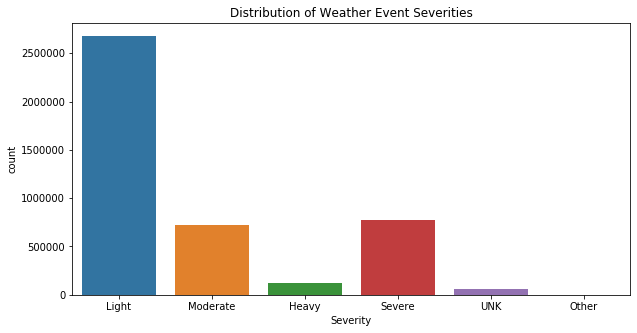

In [12]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Weather Event Types')
sns.countplot(x='Type',data=weather)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Distribution of Weather Event Severities')
sns.countplot(x='Severity',data=weather)
plt.show()

#### First look at data
From the first look at the traffic and weather datasets we can see that both datasets have some heavy weighting - the distribution of traffic types leans heavily towards congestion and the distribution of weather types leans heavily towards rain.  These preferences are expected from what are experienced on a day-to-day basis - we're most likely to experience rain than any other type of precipitation, and congestion is practically occurring all the time.

## Feature Engineering

In [13]:
#Create date column for day
traffic['date'] = pd.to_datetime(traffic['StartTime(UTC)'])
weather['date'] = pd.to_datetime(weather['StartTime(UTC)'])

traffic.date = traffic.date.dt.strftime('%x')
weather.date = weather.date.dt.strftime('%x')

#Convert start and end time to datetime object for manipulation
traffic['EndTime(UTC)'] = pd.to_datetime(traffic['EndTime(UTC)'])
weather['EndTime(UTC)'] = pd.to_datetime(weather['EndTime(UTC)'])

traffic['StartTime(UTC)'] = pd.to_datetime(traffic['StartTime(UTC)'])
weather['StartTime(UTC)'] = pd.to_datetime(weather['StartTime(UTC)'])

In [14]:
#Calculate event durations
weather['weather_duration'] = weather['EndTime(UTC)'] - weather['StartTime(UTC)']
traffic['traffic_duration'] = traffic['EndTime(UTC)'] - traffic['StartTime(UTC)']

In [15]:
#Convert durations to total hours
weather['weather_duration'] = (weather['weather_duration'].dt.total_seconds())/3600
traffic['traffic_duration'] = (traffic['traffic_duration'].dt.total_seconds())/3600

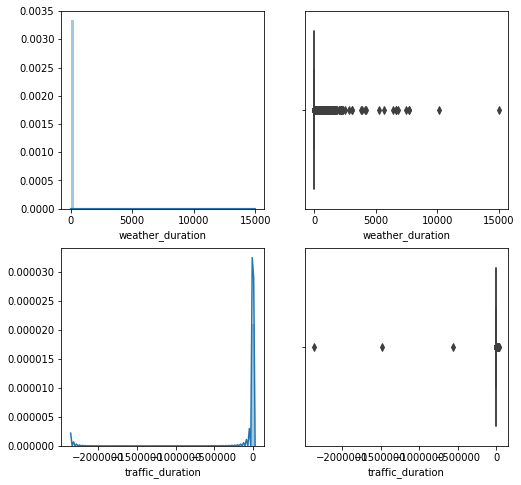

In [16]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)
sns.distplot(weather['weather_duration'], ax=axes[0, 0])
sns.boxplot(weather['weather_duration'], ax=axes[0, 1])
sns.distplot(traffic['traffic_duration'].dropna(), ax=axes[1, 0])
sns.boxplot(traffic['traffic_duration'].dropna(), ax=axes[1, 1])
plt.show()

In [17]:
weather['weather_duration'].quantile([0, 0.02, 0.05, 0.25, 0.95, 0.97, 0.98, 0.99])

0.00     0.000000
0.02     0.100000
0.05     0.150000
0.25     0.333333
0.95     4.333333
0.97     6.000000
0.98     7.333333
0.99    10.300000
Name: weather_duration, dtype: float64

In [18]:
weather['weather_duration'].describe()

count    4.362031e+06
mean     1.377859e+00
std      1.600396e+01
min      0.000000e+00
25%      3.333333e-01
50%      6.666667e-01
75%      1.283333e+00
max      1.499463e+04
Name: weather_duration, dtype: float64

In [19]:
traffic['traffic_duration'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

0.00   -2.358950e+06
0.10    4.905556e-01
0.20    6.861111e-01
0.30    7.019444e-01
0.40    7.144444e-01
0.50    7.388889e-01
0.60    7.758333e-01
0.70    8.627778e-01
0.80    1.026111e+00
0.90    1.517222e+00
0.99    9.000000e+00
Name: traffic_duration, dtype: float64

In [20]:
traffic['traffic_duration'].describe()

count    2.511905e+07
mean     4.946778e+00
std      5.830936e+02
min     -2.358950e+06
25%      6.952778e-01
50%      7.388889e-01
75%      9.408333e-01
max      2.848897e+04
Name: traffic_duration, dtype: float64

In [21]:
#Apply one way winsorization and limit the weathers higher end of the data to the 85th percentile
weather['weather_duration'] = winsorize(weather['weather_duration'], (0, 0.15))

#Apply two way winsorization and limit the traffics higher end of the data to the 95th percentile and the lower end to the 5th
traffic['traffic_duration'] = winsorize(traffic['traffic_duration'], (0.05, 0.2))

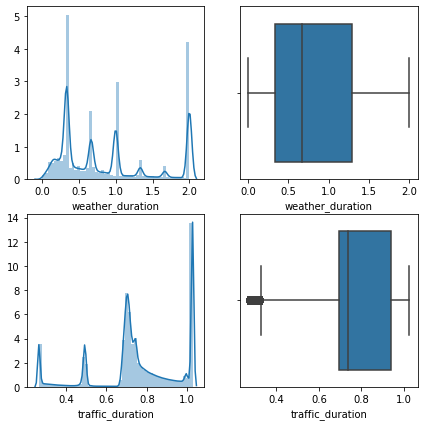

In [22]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
sns.distplot(weather['weather_duration'], ax=axes[0, 0])
sns.boxplot(weather['weather_duration'], ax=axes[0, 1])
sns.distplot(traffic['traffic_duration'].dropna(), ax=axes[1, 0])
sns.boxplot(traffic['traffic_duration'].dropna(), ax=axes[1, 1])
plt.show()

In [23]:
traffic.drop((traffic[traffic['Side'] == ' '].index), inplace=True)
traffic.drop((traffic[traffic['Side'] == 'N'].index), inplace=True)

In [24]:
traffic.drop((traffic[traffic['Side'] == 'N'].index), inplace=True)

In [25]:
#Drop columns that will no longer be used
weather = weather.drop(columns=['EventId','LocationLat','LocationLng','StartTime(UTC)','EndTime(UTC)','TimeZone','AirportCode','City','County','State'])
traffic = traffic.drop(columns=['EventId','TMC','TimeZone','LocationLat','LocationLng','EndTime(UTC)','AirportCode','Number','Street','City','County'])

In [26]:
#Group by zipcode and date to view weather events observed per day
weather[['date','ZipCode','Type','Severity']].groupby(['ZipCode','date']).agg('count')

Type  Severity
ZipCode date                    
1022.0  01/01/17     2         2
        01/01/18     1         1
        01/01/19     7         7
        01/02/18     1         1
        01/03/17    11        11
...                ...       ...
99362.0 12/30/16     1         1
        12/30/17     3         3
        12/30/18     4         4
        12/31/17     1         1
        12/31/19     3         3

[1163903 rows x 2 columns]

In [27]:
#View a date with multiple events
weather.loc[(weather.date=='12/31/19')&(weather.ZipCode==99163)]

,Type,Severity,ZipCode,date,weather_duration
3355706,Snow,Light,99163.0,12/31/19,0.866667
3355707,Snow,Light,99163.0,12/31/19,1.000000
3355708,Snow,Light,99163.0,12/31/19,2.000000
3355709,Snow,Moderate,99163.0,12/31/19,0.283333
3355710,Snow,Light,99163.0,12/31/19,0.116667
3355711,Snow,Moderate,99163.0,12/31/19,0.600000
3355712,Snow,Heavy,99163.0,12/31/19,0.433333
3355713,Snow,Moderate,99163.0,12/31/19,1.083333
3355714,Rain,Light,99163.0,12/31/19,2.000000
3355715,Rain,Light,99163.0,12/31/19,1.000000


In [28]:
#View a date with multiple events
weather.loc[(weather.date=='12/31/19')&(weather.ZipCode==99212)]

,Type,Severity,ZipCode,date,weather_duration
3329807,Snow,Light,99212.0,12/31/19,1.000000
3329808,Snow,Light,99212.0,12/31/19,0.216667
3329809,Snow,Light,99212.0,12/31/19,0.150000
3329810,Snow,Light,99212.0,12/31/19,1.233333
3329811,Snow,Light,99212.0,12/31/19,2.000000
3329812,Snow,Moderate,99212.0,12/31/19,0.200000
3329813,Snow,Light,99212.0,12/31/19,0.683333
3329814,Snow,Moderate,99212.0,12/31/19,0.400000
3329815,Snow,Light,99212.0,12/31/19,0.133333
3329816,Snow,Moderate,99212.0,12/31/19,0.583333


In [29]:
#Rename columns before merging
weather=weather.rename(columns={'Type':'weather_type','Severity':'weather_severity'})
traffic=traffic.rename(columns={'Type':'traffic_type','Severity':'traffic_severity','StartTime(UTC)':'traffic_start','Description':'traffic_description'})

In [30]:
#Get dummy variables for weather type and severity for counting measured events on date
weather = pd.get_dummies(data=weather, columns=['weather_type', 'weather_severity'])

In [31]:
#Merge traffic and weather data on zipcode and date
merged = traffic.merge(weather.groupby(['date','ZipCode']).agg('sum'), how='left', on=['date', 'ZipCode'])

In [32]:
merged['traffic_severity'].describe()

count     20380005
unique           6
top           Fast
freq       7439871
Name: traffic_severity, dtype: object

In [33]:
merged['traffic_severity'] = merged['traffic_severity'].fillna('Fast')

In [34]:
merged = merged.dropna(subset=['State','ZipCode'])

In [35]:
merged.isnull().sum()*100/merged.isnull().count()

traffic_type                   0.000000
traffic_severity               0.000000
traffic_description            0.000016
traffic_start                  0.000000
Distance(mi)                   0.000000
Side                           0.000000
State                          0.000000
ZipCode                        0.000000
date                           0.000000
traffic_duration               0.000000
weather_duration              94.891498
weather_type_Cold             94.891498
weather_type_Fog              94.891498
weather_type_Hail             94.891498
weather_type_Precipitation    94.891498
weather_type_Rain             94.891498
weather_type_Snow             94.891498
weather_type_Storm            94.891498
weather_severity_Heavy        94.891498
weather_severity_Light        94.891498
weather_severity_Moderate     94.891498
weather_severity_Other        94.891498
weather_severity_Severe       94.891498
weather_severity_UNK          94.891498
dtype: float64

In [36]:
#Get dummy variables for traffic type and severity for modeling purposes
merged = pd.get_dummies(data=merged, columns=['traffic_type', 'traffic_severity', 'Side'])

In [37]:
merged.columns

Index(['traffic_description', 'traffic_start', 'Distance(mi)', 'State',
       'ZipCode', 'date', 'traffic_duration', 'weather_duration',
       'weather_type_Cold', 'weather_type_Fog', 'weather_type_Hail',
       'weather_type_Precipitation', 'weather_type_Rain', 'weather_type_Snow',
       'weather_type_Storm', 'weather_severity_Heavy',
       'weather_severity_Light', 'weather_severity_Moderate',
       'weather_severity_Other', 'weather_severity_Severe',
       'weather_severity_UNK', 'traffic_type_Accident',
       'traffic_type_Broken-Vehicle', 'traffic_type_Congestion',
       'traffic_type_Construction', 'traffic_type_Event',
       'traffic_type_Flow-Incident', 'traffic_type_Lane-Blocked',
       'traffic_severity_Fast', 'traffic_severity_Long',
       'traffic_severity_Moderate', 'traffic_severity_Other',
       'traffic_severity_Short', 'traffic_severity_Slow', 'Side_L', 'Side_R'],
      dtype='object')

In [38]:
merged_crossover = merged.copy()
merged_crossover = merged_crossover.dropna()

In [39]:
merged_crossover.shape

(1282171, 36)

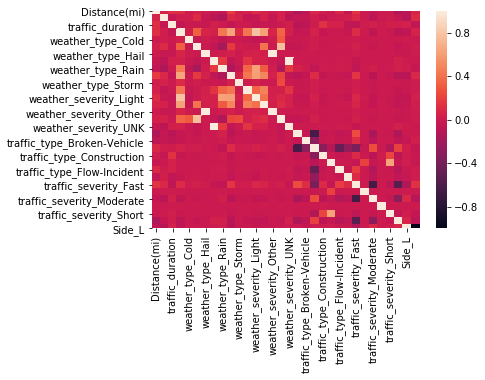

In [40]:
sns.heatmap(merged_crossover.corr())

#### Resulting Data
The result of merging the data and taking the cross section is a data set containing roughly 1.3 million rows of data.  The resulting heat map suggest some form of correlation between a significant amount of the features.

## Sample and Model Data
Because of the large amount of data and the high dimension output from one-hot encoding all the categorical features of the original data I was left with a data set that on the first run of the K-Means algorithm I had to interrupt the kernel. Because of that here I'm going to take a random sample of the data and run through a few models to see how they perform.

In [41]:
X = merged_crossover.drop(columns=['traffic_description','traffic_start','State','ZipCode','date'])

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [42]:
# Define standard PCA 
pca_all = PCA()

# Fit standardized data to PCA
pca_all.fit(X_std)

# Print explained variance
print(pca_all.explained_variance_ratio_)

[1.15906375e-01 8.30434212e-02 7.29860742e-02 6.44099319e-02
 6.36013292e-02 5.70099317e-02 5.46366335e-02 4.44538475e-02
 4.15820647e-02 3.75703763e-02 3.47265551e-02 3.42016879e-02
 3.32644048e-02 3.26821338e-02 3.22584483e-02 3.22216840e-02
 3.13863979e-02 2.74371270e-02 2.69297885e-02 2.37893080e-02
 2.28717423e-02 1.63995458e-02 9.64945246e-03 4.58852139e-03
 2.39321718e-03 2.55657532e-31 2.46216145e-31 1.54411165e-31
 1.06423135e-31 1.35243231e-32 5.17579236e-34]


In [43]:
# From the above we can see that over 85% of the variance can be explained by the 1st 17 components
# Because of the volume of the data reducing the dimensionality will reduce our use of resources
# We just want the first fifteen principal components for analization
pca15 = PCA(n_components=15)

# We get the components by 
# calling fit_transform method with our data
feat_red = pca15.fit_transform(X_std)

In [44]:
# Because of the amount of data we are dealing with lets take a sample
# and run some clustering algorithms on the sample to decide which one to then run
feat_red_sample = feat_red[np.random.choice(feat_red.shape[0], 100000, replace=False), :]

In [45]:
# Defining the mini-batch k-means for 2 clusters
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)

# Fit and predict model
minikmeans_cluster.fit(feat_red_sample)
y_pred = minikmeans_cluster.predict(feat_red_sample)

In [46]:
print("Silhouette score for the mini-batch K-means model for 2 clusters: {}".format(
    metrics.silhouette_score(feat_red_sample, y_pred, metric='euclidean')))

Silhouette score for the mini-batch K-means model for 2 clusters: 0.2036477050136436


In [47]:
# Defining the GMM clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(feat_red_sample)

In [48]:
print("Silhouette score for the GMM clustering model: {}".format(
    metrics.silhouette_score(feat_red_sample, clusters, metric='euclidean')))

Silhouette score for the GMM clustering model: 0.3472597322728237


In [49]:
# Defining DBSCAN clustering
dbscan_cluster = DBSCAN(eps=0.6, min_samples=100)

# Fit model
clusters = dbscan_cluster.fit_predict(feat_red_sample)

In [50]:
print("Silhouette score for the DBSCAN clustering model: {}".format(
    metrics.silhouette_score(feat_red_sample, clusters, metric='euclidean')))

Silhouette score for the DBSCAN clustering model: 0.03734988478894954


#### Model
The GMM algorithm seems to have a high performing silhouette score, but because the GMM algorithm does not scale well with dimensions and samples I'm going to run with the mini-batch K-means model.

## Mini-Batch K-Means
Next we'll run through several different cluster scenarios to see which performs best.

In [51]:
# We just want the first two principal components for visualization
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

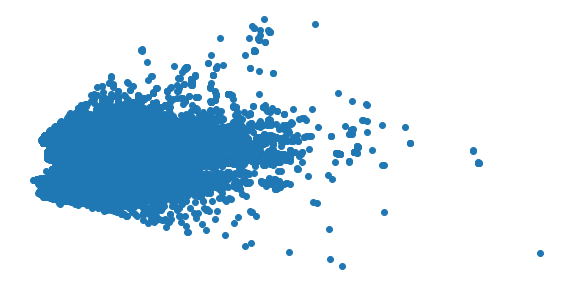

In [52]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

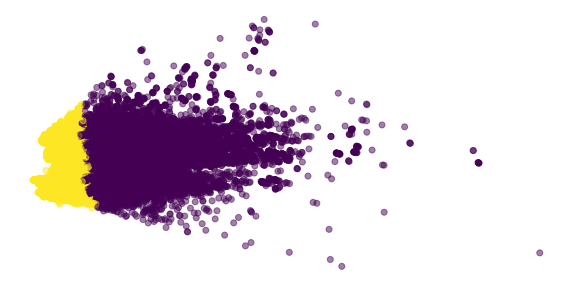

In [53]:
# Defining the mini-batch k-means for 2 clusters
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)

# Fit and predict model
minikmeans_cluster.fit(X_std)
y_pred2 = minikmeans_cluster.predict(X_std)

# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, c=y_pred2)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [54]:
print("Silhouette score for the mini-batch K-means model for 2 clusters: {}".format(
    metrics.silhouette_score(X_std, y_pred2, metric='euclidean', sample_size=100000, random_state=123)))

Silhouette score for the mini-batch K-means model for 2 clusters: 0.25189210602046724


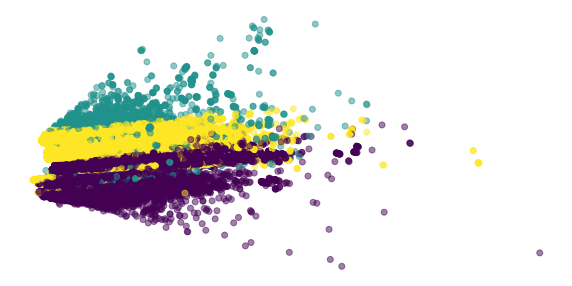

In [55]:
# Defining the mini-batch k-means for 3 clusters
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)

# Fit and predict model
minikmeans_cluster.fit(X_std)
y_pred3 = minikmeans_cluster.predict(X_std)

# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, c=y_pred3)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [56]:
print("Silhouette score for the mini-batch K-means model for 3 clusters: {}".format(
    metrics.silhouette_score(X_std, y_pred3, metric='euclidean', sample_size=100000, random_state=123)))

Silhouette score for the mini-batch K-means model for 3 clusters: 0.1275191145299809


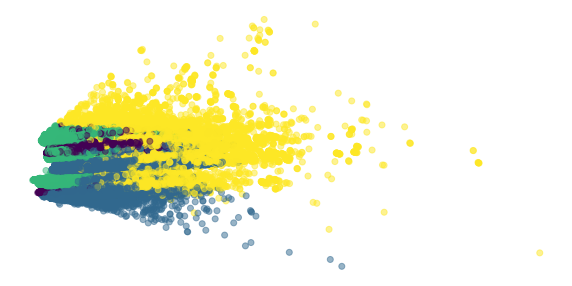

In [57]:
# Defining the mini-batch k-means for 4 clusters
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)

# Fit and predict model
minikmeans_cluster.fit(X_std)
y_pred4 = minikmeans_cluster.predict(X_std)

# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, c=y_pred4)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [58]:
print("Silhouette score for the mini-batch K-means model for 4 clusters: {}".format(
    metrics.silhouette_score(X_std, y_pred4, metric='euclidean', sample_size=100000, random_state=123)))

Silhouette score for the mini-batch K-means model for 4 clusters: 0.09546477514560842


The scenario with the highest silhouette score is the 2-cluster scenario.

## Analyze Clusters
Lets take a closer look at the clusters formed in the scenario above and see if anything gleams through.

In [59]:
# Bring clusters back to dataframe for analysis
merged_crossover['cluster'] = y_pred2

In [60]:
weather_type = merged_crossover.drop(columns=['traffic_description', 'traffic_start', 'Distance(mi)', 'State',
       'ZipCode', 'date', 'traffic_duration', 'weather_duration','weather_severity_Heavy',
       'weather_severity_Light', 'weather_severity_Moderate',
       'weather_severity_Other', 'weather_severity_Severe',
       'weather_severity_UNK', 'traffic_type_Accident',
       'traffic_type_Broken-Vehicle', 'traffic_type_Congestion',
       'traffic_type_Construction', 'traffic_type_Event',
       'traffic_type_Flow-Incident', 'traffic_type_Lane-Blocked',
       'traffic_severity_Fast', 'traffic_severity_Long',
       'traffic_severity_Moderate', 'traffic_severity_Other',
       'traffic_severity_Short', 'traffic_severity_Slow', 'Side_L', 'Side_R',
       'cluster'])
weather_severity = merged_crossover.drop(columns=['traffic_description', 'traffic_start', 'Distance(mi)', 'State',
       'ZipCode', 'date', 'traffic_duration', 'weather_duration',
       'weather_type_Cold', 'weather_type_Fog', 'weather_type_Hail',
       'weather_type_Precipitation', 'weather_type_Rain', 'weather_type_Snow',
       'weather_type_Storm', 'traffic_type_Accident',
       'traffic_type_Broken-Vehicle', 'traffic_type_Congestion',
       'traffic_type_Construction', 'traffic_type_Event',
       'traffic_type_Flow-Incident', 'traffic_type_Lane-Blocked',
       'traffic_severity_Fast', 'traffic_severity_Long',
       'traffic_severity_Moderate', 'traffic_severity_Other',
       'traffic_severity_Short', 'traffic_severity_Slow', 'Side_L', 'Side_R',
       'cluster'])

In [61]:
merged_crossover = merged_crossover.drop(columns=['weather_type_Cold', 'weather_type_Fog', 'weather_type_Hail',
       'weather_type_Precipitation', 'weather_type_Rain', 'weather_type_Snow',
       'weather_type_Storm', 'weather_severity_Heavy',
       'weather_severity_Light', 'weather_severity_Moderate',
       'weather_severity_Other', 'weather_severity_Severe',
       'weather_severity_UNK', 'traffic_type_Accident',
       'traffic_type_Broken-Vehicle', 'traffic_type_Congestion',
       'traffic_type_Construction', 'traffic_type_Event',
       'traffic_type_Flow-Incident', 'traffic_type_Lane-Blocked',
       'traffic_severity_Fast', 'traffic_severity_Long',
       'traffic_severity_Moderate', 'traffic_severity_Other',
       'traffic_severity_Short', 'traffic_severity_Slow', 'Side_L', 'Side_R'])
merged_crossover['weather_severity'] = weather_severity.idxmax(axis=1)
merged_crossover['weather_type'] = weather_type.idxmax(axis=1)
merged_crossover['weather_severity'] = merged_crossover['weather_severity'].astype(str)
merged_crossover['weather_type'] = merged_crossover['weather_type'].astype(str)

In [62]:
merged_crossover['weather_type']=(merged_crossover['weather_type']).str[13:]
merged_crossover['weather_severity']=(merged_crossover['weather_severity']).str[17:]

In [63]:
merged_crossover = merged_crossover.merge(traffic.drop(columns=['traffic_description',
       'traffic_start', 'Distance(mi)', 'State', 'ZipCode', 'date',
       'traffic_duration']), how='left', left_index=True, right_index=True)

In [64]:
merged_crossover['traffic_severity'] = merged_crossover['traffic_severity'].fillna('Fast')

In [65]:
merged_crossover['weather_type'] = merged_crossover['weather_type'].astype('category')
merged_crossover['weather_severity'] = merged_crossover['weather_severity'].astype('category')
merged_crossover['traffic_type'] = merged_crossover['traffic_type'].astype('category')
merged_crossover['traffic_severity'] = merged_crossover['traffic_severity'].astype('category')
merged_crossover['Side'] = merged_crossover['Side'].astype('category')
merged_crossover['cluster'] = merged_crossover['cluster'].astype('category')

In [66]:
merged_crossover

,traffic_description,traffic_start,Distance(mi),State,ZipCode,date,traffic_duration,weather_duration,cluster,weather_severity,weather_type,traffic_type,traffic_severity,Side
835,Delays of two minutes on Redwood Hwy Northboun...,2016-08-02 00:23:00,0.00,CA,94954.0,08/02/16,0.266944,0.666667,1,Severe,Cold,Congestion,Fast,R
915,Auxiliary lane closed due to long-term constru...,2016-11-15 15:45:31,0.01,CA,94303.0,11/15/16,1.026111,1.500000,1,Moderate,Fog,Construction,Fast,R
924,Right hand shoulder closed due to construction...,2016-11-09 17:59:21,0.01,CA,95616.0,11/09/16,1.026111,0.416667,1,Severe,Cold,Construction,Fast,R
1110,Delays of three minutes on CA-29 Southbound be...,2016-12-01 02:14:00,1.17,CA,94558.0,12/01/16,0.312222,2.983333,1,Severe,Fog,Congestion,Moderate,R
1160,Delays of four minutes on San Mateo Rd Eastbou...,2016-12-01 02:49:00,0.21,CA,94019.0,12/01/16,0.266944,1.000000,1,Moderate,Fog,Congestion,Moderate,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25118810,Delays of three minutes on Antelope Valley Fwy...,2017-08-31 01:33:00,0.73,CA,93501.0,08/31/17,0.711389,0.666667,1,Light,Rain,Congestion,Moderate,L
25118851,Delays of one minute and delays easing on Rive...,2017-08-31 01:37:00,3.27,CA,92880.0,08/31/17,0.826111,0.333333,1,Light,Fog,Broken-Vehicle,Fast,R
25118883,Delays of two minutes and delays easing on Riv...,2017-08-31 01:44:00,4.50,CA,92880.0,08/31/17,0.844722,0.333333,1,Light,Fog,Flow-Incident,Fast,R
25118931,Delays of two minutes on Riverside Fwy Eastbou...,2017-08-31 02:09:00,5.02,CA,92880.0,08/31/17,0.687778,0.333333,1,Light,Fog,Congestion,Fast,R


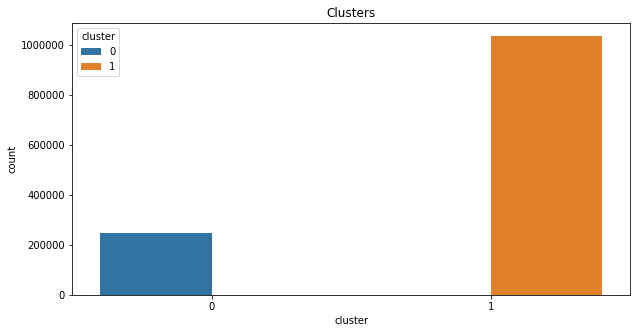

In [67]:
plt.figure(figsize=(10,5))
plt.title('Clusters')
sns.countplot(x='cluster', hue='cluster', data=merged_crossover)
plt.show()

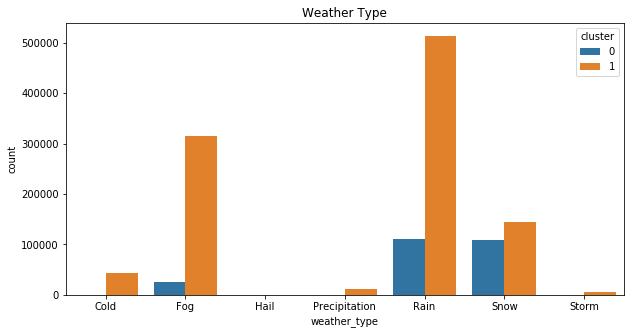

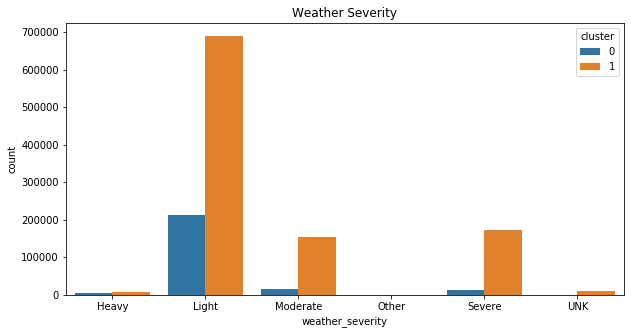

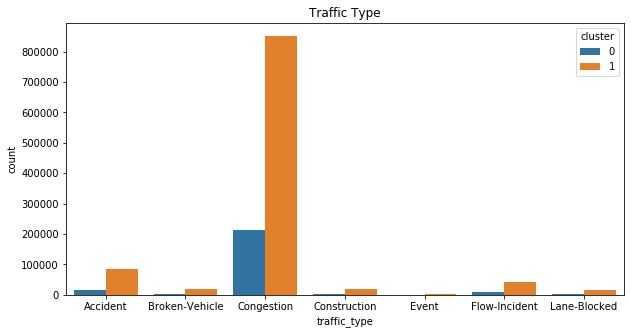

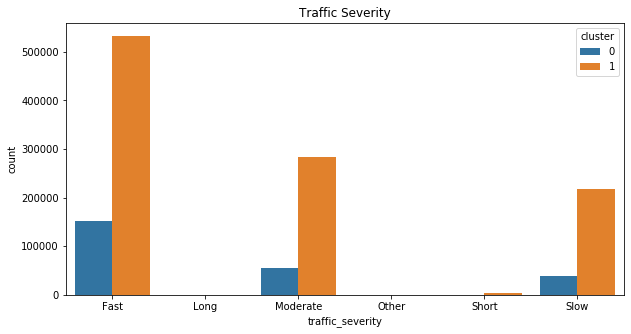

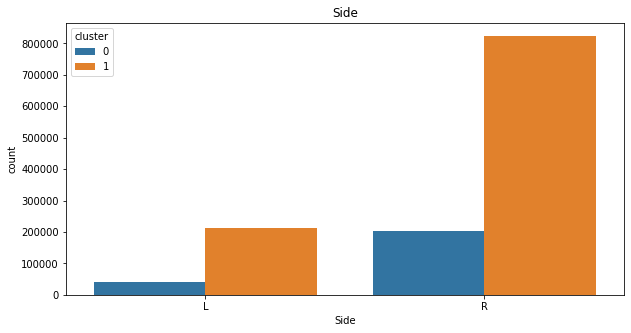

In [68]:
plt.figure(figsize=(10,5))
plt.title('Weather Type')
sns.countplot(x='weather_type', hue='cluster', data=merged_crossover)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Weather Severity')
sns.countplot(x='weather_severity', hue='cluster', data=merged_crossover)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Traffic Type')
sns.countplot(x='traffic_type', hue='cluster', data=merged_crossover)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Traffic Severity')
sns.countplot(x='traffic_severity', hue='cluster', data=merged_crossover)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Side')
sns.countplot(x='Side', hue='cluster', data=merged_crossover)
plt.show()

In [69]:
merged_crossover['weather'] = merged_crossover['weather_severity'].astype('str') + merged_crossover['weather_type'].astype('str')
merged_crossover['traffic'] = merged_crossover['traffic_severity'].astype('str') + merged_crossover['traffic_type'].astype('str')

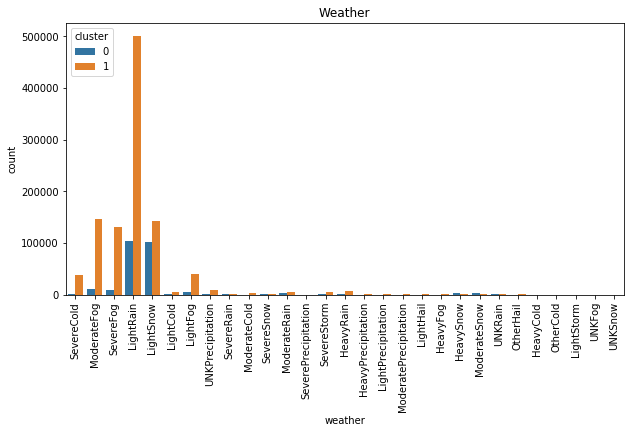

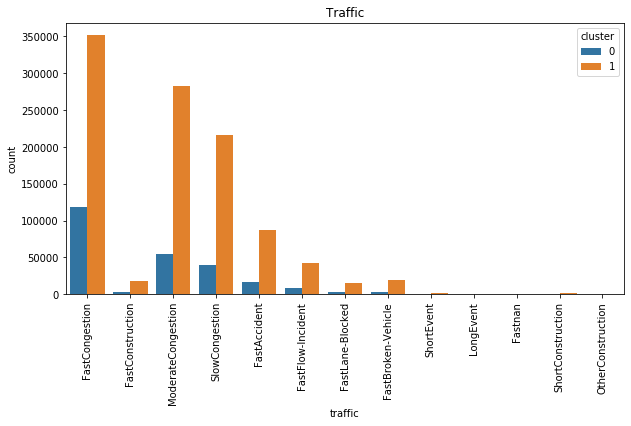

In [70]:
plt.figure(figsize=(10,5))
plt.title('Weather')
sns.countplot(x='weather', hue='cluster', data=merged_crossover)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Traffic')
sns.countplot(x='traffic', hue='cluster', data=merged_crossover)
plt.xticks(rotation=90)
plt.show()

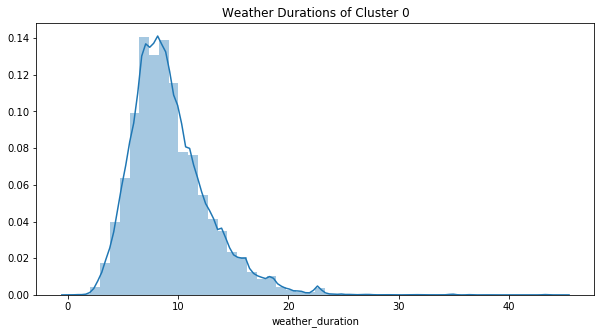

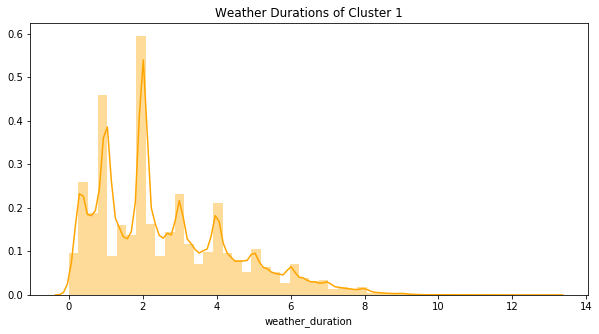

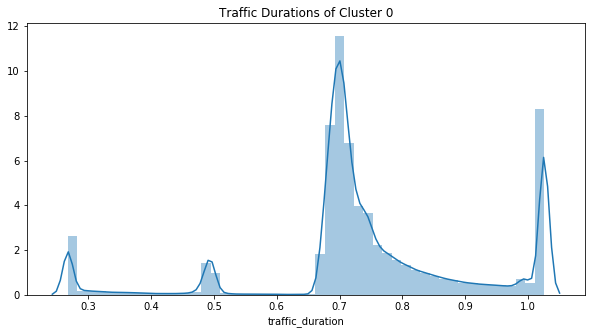

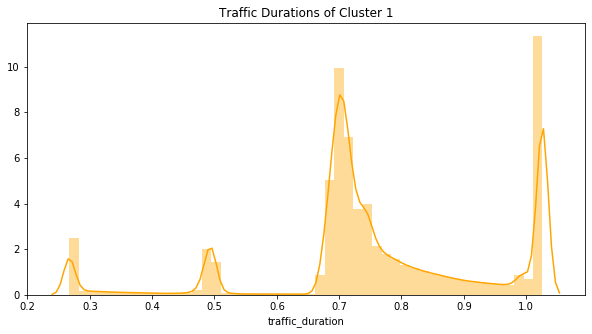

In [71]:
plt.figure(figsize=(10,5))
plt.title('Weather Durations of Cluster 0')
sns.distplot(merged_crossover['weather_duration'].loc[merged_crossover.cluster==0])
plt.show()

plt.figure(figsize=(10,5))
plt.title('Weather Durations of Cluster 1')
sns.distplot(merged_crossover['weather_duration'].loc[merged_crossover.cluster==1], color='orange')
plt.show()

plt.figure(figsize=(10,5))
plt.title('Traffic Durations of Cluster 0')
sns.distplot(merged_crossover['traffic_duration'].loc[merged_crossover.cluster==0])
plt.show()

plt.figure(figsize=(10,5))
plt.title('Traffic Durations of Cluster 1')
sns.distplot(merged_crossover['traffic_duration'].loc[merged_crossover.cluster==1], color='orange')
plt.show()

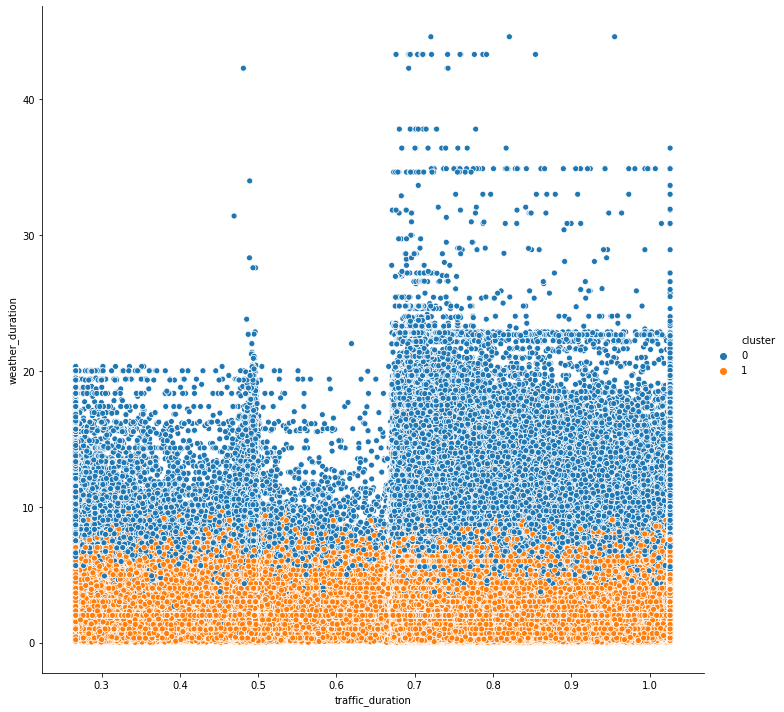

In [75]:
sns.relplot(x='traffic_duration', y='weather_duration', hue='cluster', height=10, data=merged_crossover)
plt.show()

## Summary
Given the nature of traffic and weather's randomness it's hard to gleam insight into how the clusters were formed, but we know that there were similarities discovered within the clusters.  We can see that cluster 0 shown in blue received a whopping 85% of the data.  In general cluster 0 seems to occur in the areas of low weather durations.  Looking at the distributions of weather and traffic duration between the clusters cluster 0 has weather duration concentrated on the lower end and traffic durations concentrated on the higher end.  Cluster 1 also has weather duration concentrated on the lower end but traffic durations are more evenly disbursed between several peaks.
My interpretation of the clustering would be that cluster 0 houses the more everyday occurrences of traffic congestion due to weather and cluster 1 more of the outlying events.  With more insight and analysis into the clusters path routing and traffic analysis could be tailored based on the specific event that is occurring.